# TASK 2

## Import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
data = pd.read_csv('train.csv')

## Display basic information

In [5]:
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:\n", data.describe())

Dataset Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

## Check for missing values

In [6]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Handle missing values
## Fill missing values for 'Age' with the median

In [20]:
data['Age'].fillna(data['Age'].median(), inplace=True)

## Fill missing values for 'Embarked' with the mode

In [21]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

## Drop 'Cabin' column due to a high percentage of missing values

In [11]:
data.drop(columns=['Cabin'], inplace=True)

## Verify missing values after cleaning

In [12]:
print("\nMissing Values After Cleaning:\n", data.isnull().sum())


Missing Values After Cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Visualize distributions

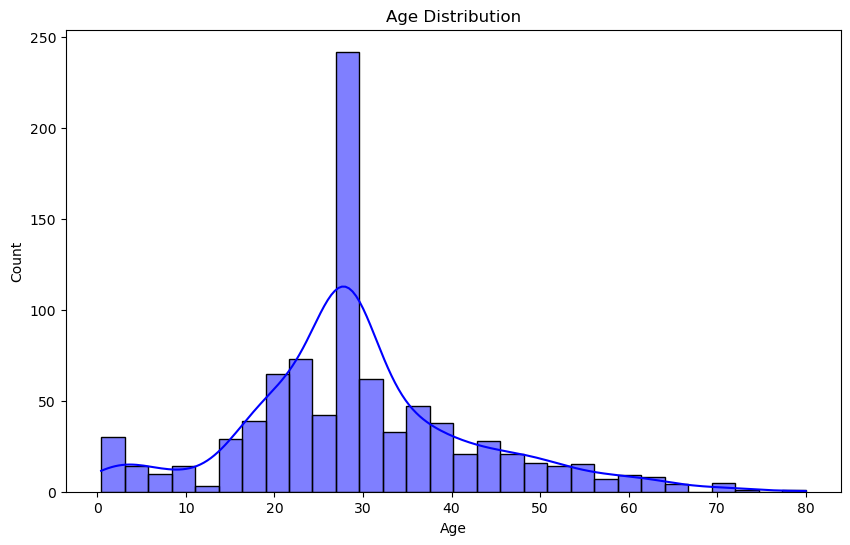

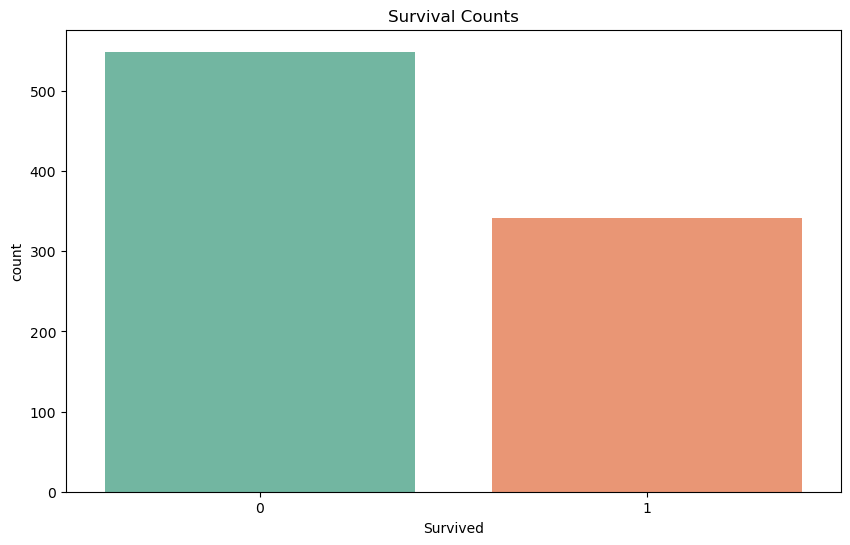

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Survival Counts')
plt.show()

## Explore relationships
## Survival rate by gender

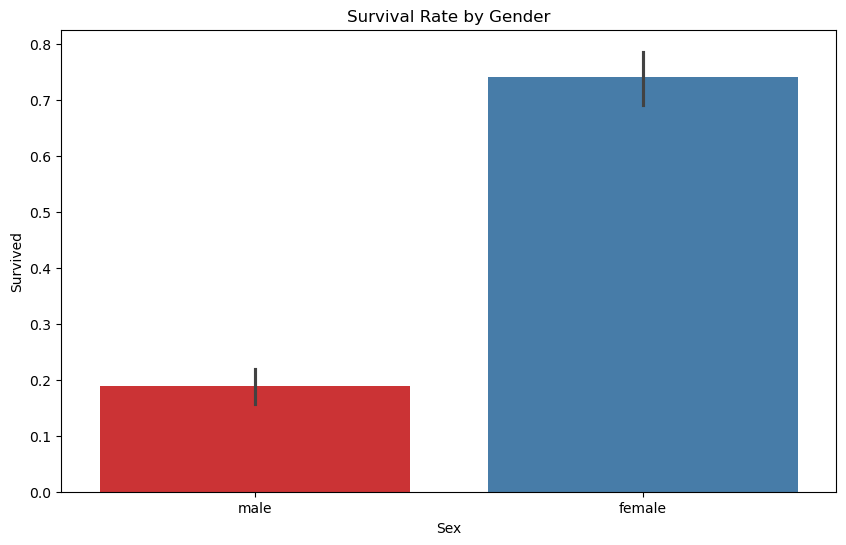

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data, palette='Set1')
plt.title('Survival Rate by Gender')
plt.show()


## Survival rate by class

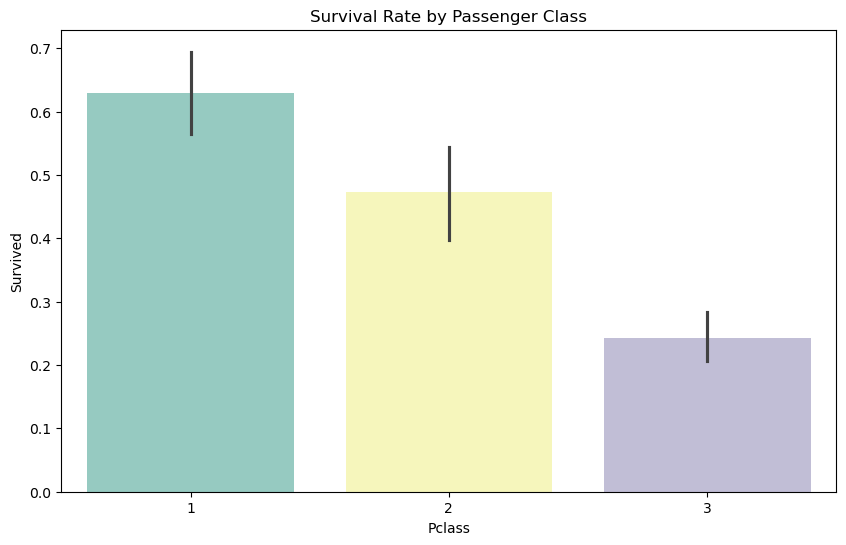

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data, palette='Set3')
plt.title('Survival Rate by Passenger Class')
plt.show()

## Correlation heatmap

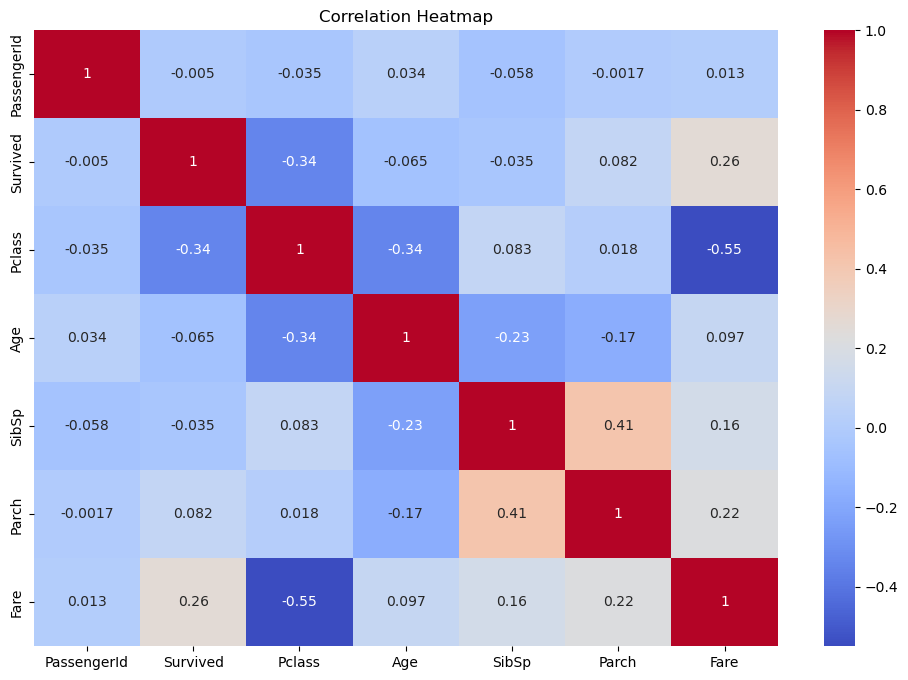

In [17]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Pairplot for selected features

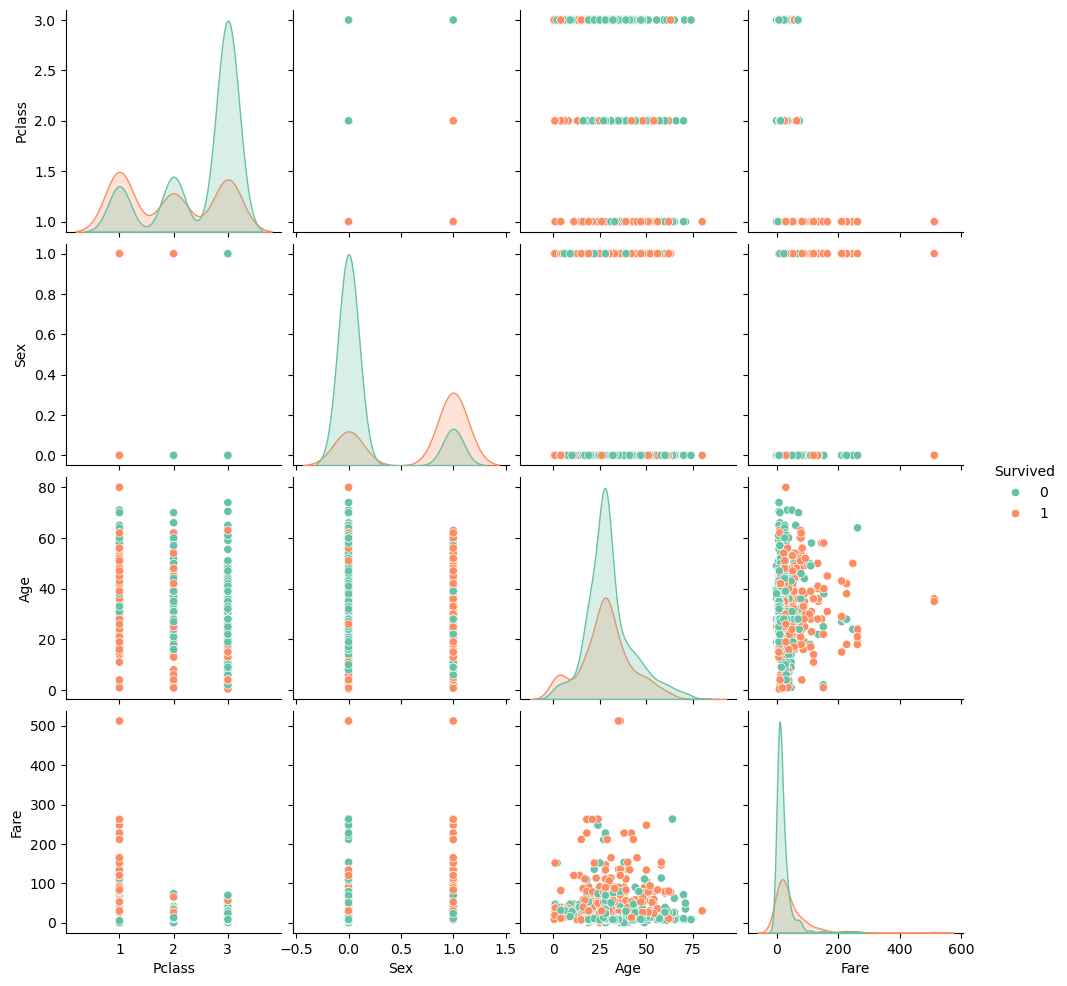

In [18]:
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
data_encoded = data.copy()
data_encoded['Sex'] = data_encoded['Sex'].map({'male': 0, 'female': 1})  # Encode categorical variable
sns.pairplot(data_encoded[selected_features], hue='Survived', palette='Set2')
plt.show()
